# Домашняя работа №1: Метод K-ближайших соседей (KNN)

**Цель:**  
1. Освоить работу алгоритма KNN для задач многоклассовой классификации и регрессии.  
2. Научиться рассчитывать и интерпретировать метрики качества.  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris, load_wine, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    mean_absolute_error, mean_squared_error, r2_score
)


## Задача 1. KNN для многоклассовой классификации

1 (1 балл). Выберите набор данных из датасетов sklean с несколькими классами (например, `Iris` или `Wine` – оба датасета импортированы в предыдущей ячейке).  
2 (1 балл). Разделите данные на обучающую и тестовую выборки.    
3 (1 балл). Обучите модель `KNeighborsClassifier`.  
4 (1 балл). Постройте confusion_matrix.

5 (1 балл). Посчитайте метрики оценки качества для задач классификации: accuracy, precision, recall, f1-score и сделайте выводы о качестве модели.  

In [7]:
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print(f"accuracy: {accuracy_score(y_test, pred)}")

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

accuracy: 1.0


идеальное качество модели, ни одного неверного ответа)


## Задача 2. KNN для регрессии

1 (1 балл). Выберите набор данных из датасетов sklearn (например, `load_diabetes` – он импортирован в ячейке с импортами).  
2 (1 балл). Разделите данные на обучающую и тестовую выборки.  
3 (1 балл). Обучите модель `KNeighborsRegressor`.  
4 (1 балл). Посчитайте метрики оценки качества для задач регрессии: `MAE`, `RMSE` и `R²`, сделайте выводы о качестве модели.  
5 (1 балл). Визуализируйте реальные и предсказанные значения на графике.  

In [10]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
model = KNeighborsRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)
print(f"mae: {mae}")
print(f"rmse: {rmse}")
print(f"r2: {r2}")

mae: 42.77078651685394
rmse: 54.946114563433675
r2: 0.43016439526042805


Качество модели нормальное. Да, не супер, но r2 не 0, уже хорошо. Довольно большие mae и rmse, значит бывают сильные ошибки. Я бы использовала что-то другое.

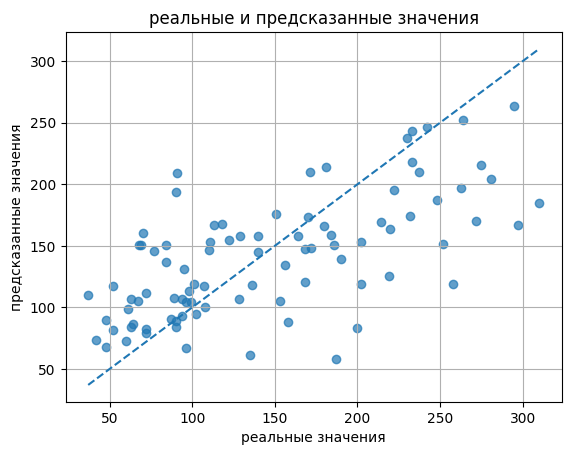

In [15]:
plt.scatter(y_test, pred, alpha=0.7)
plt.xlabel("реальные значения")
plt.ylabel("предсказанные значения")
plt.title("реальные и предсказанные значения")

min_val = min(y_test.min(), pred.min())
max_val = max(y_test.max(), pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")

plt.grid(True)
plt.show()


## Задача 3. Анализ влияния числа соседей

1 (1 балл). Изучите, как Accuracy (для классификации) или R² (для регрессии) зависит от k.  
2 (1 балл). Постройте график зависимости выбранной метрики от числа соседей.  
3 (1 балл). Сделайте вывод, как выбор k влияет на качество модели.


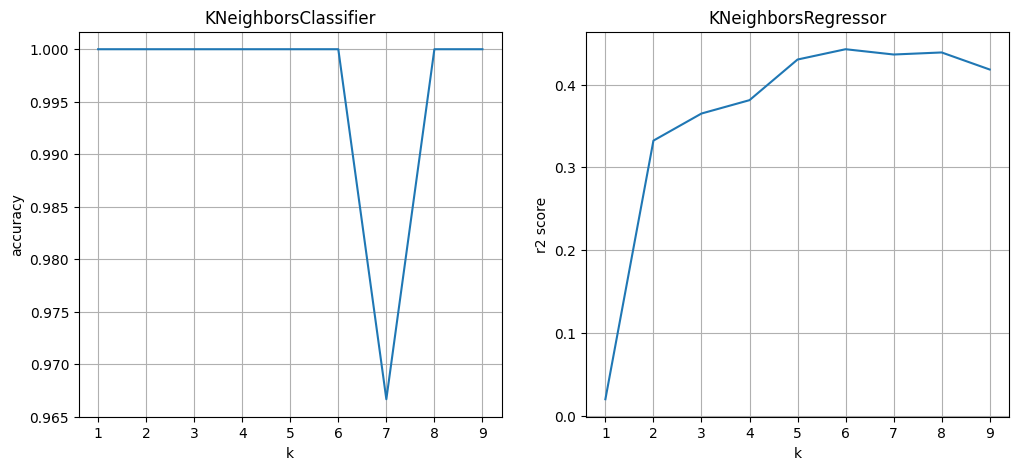

In [21]:
k = np.arange(1, 10, 1)

accuracy_scores = []
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

for i in k:
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  accuracy_scores.append(accuracy_score(y_test, pred))

r2_scores = []
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

for i in k:
  model = KNeighborsRegressor(n_neighbors=i)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  r2_scores.append(r2_score(y_test, pred))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k, accuracy_scores)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('KNeighborsClassifier')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k, r2_scores)
plt.xlabel('k')
plt.ylabel('r2 score')
plt.title('KNeighborsRegressor')
plt.grid(True)

plt.show()


У классификатора всегда идеальные значения, за исключением k=7, ну и отлично.
У регрессора точность повышается с увеличением k, на k до 4 вообще все очень плохо, но на k=6 самый лучший результат, после этого тоже видим незначительное снижение. Под каждую задачу нужно подбирать k отдельно.